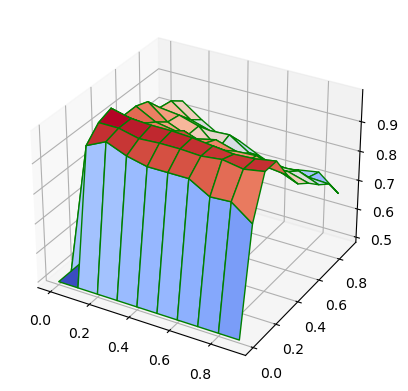

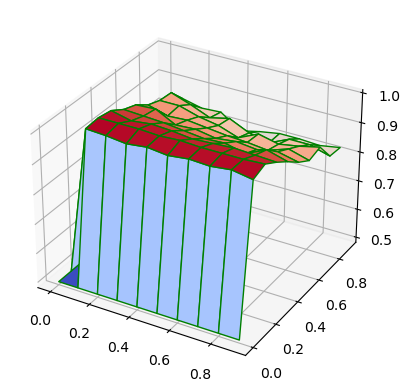

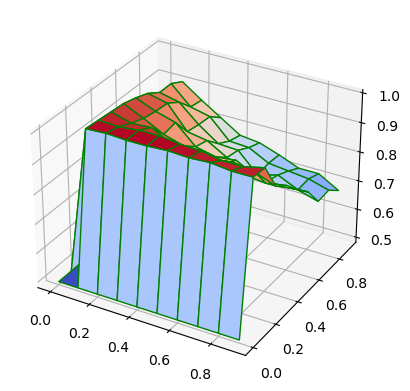

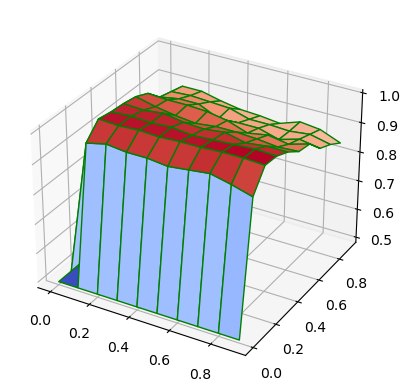

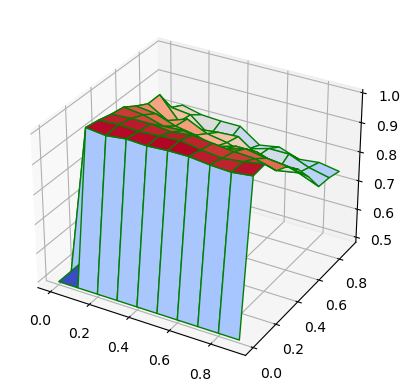

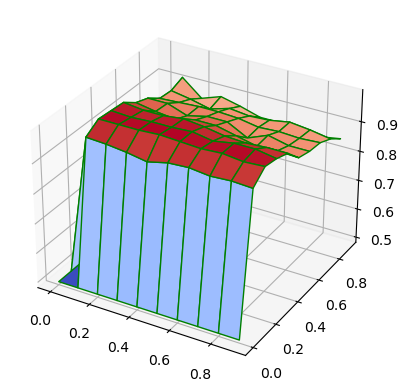

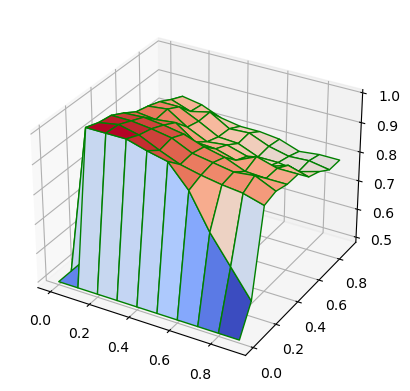

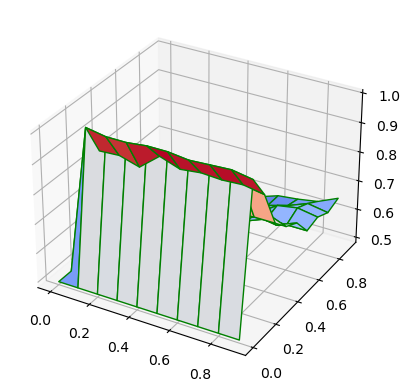

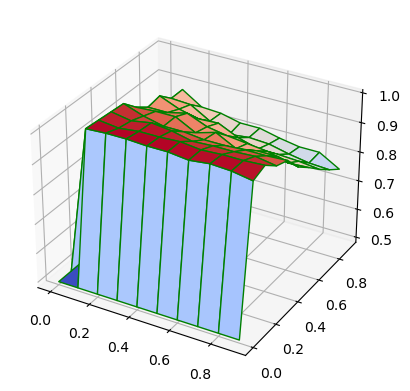

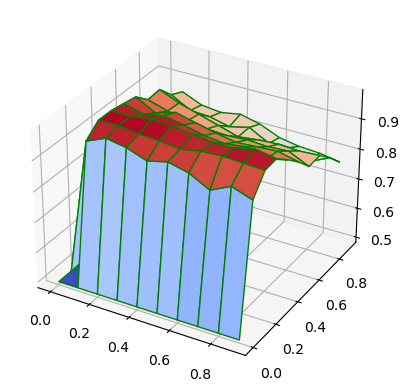

In [25]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input400sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    fig.savefig("3d_plot_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [26]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.978125  , 0.98359375, 0.97773438, 0.97148437,
        0.97226563, 0.96328125, 0.94453125, 0.93710938, 0.91523438],
       [0.4921875 , 0.9796875 , 0.98007813, 0.97578125, 0.978125  ,
        0.97265625, 0.96953125, 0.96835938, 0.96640625, 0.96757812],
       [0.4921875 , 0.96796875, 0.95      , 0.95078125, 0.94609375,
        0.94375   , 0.9421875 , 0.94296875, 0.94492188, 0.93398437],
       [0.4921875 , 0.94882813, 0.91875   , 0.909375  , 0.91523438,
        0.91328125, 0.90976563, 0.90507812, 0.90664062, 0.90351563],
       [0.4921875 , 0.9265625 , 0.8953125 , 0.89023438, 0.87695312,
        0.87695312, 0.87304688, 0.87695312, 0.86875   , 0.86523438],
       [0.4921875 , 0.90429688, 0.87851563, 0.86445313, 0.85039062,
        0.8484375 , 0.83359375, 0.83671875, 0.83632812, 0.82851562],
       [0.4921875 , 0.8875    , 0.8617187

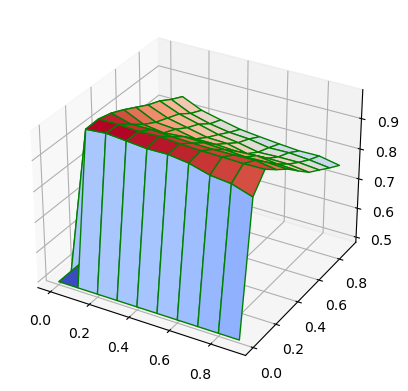

In [27]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
fig.savefig("average_accuracy_grid_over_10_samples.png".format(sample))

In [28]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [29]:
best_w1_w2

(1, 2)

In [30]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [31]:
average_accuracy_grid_10_by_10_10_samples[1]

array([0.4921875 , 0.978125  , 0.98359375, 0.97773438, 0.97148437,
       0.97226563, 0.96328125, 0.94453125, 0.93710938, 0.91523438])

In [32]:
average_accuracy_grid_10_by_10_10_samples[:,2]

array([0.4921875 , 0.98359375, 0.98007813, 0.95      , 0.91875   ,
       0.8953125 , 0.87851563, 0.86171875, 0.83320313, 0.81367188])

In [33]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[1])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,2])

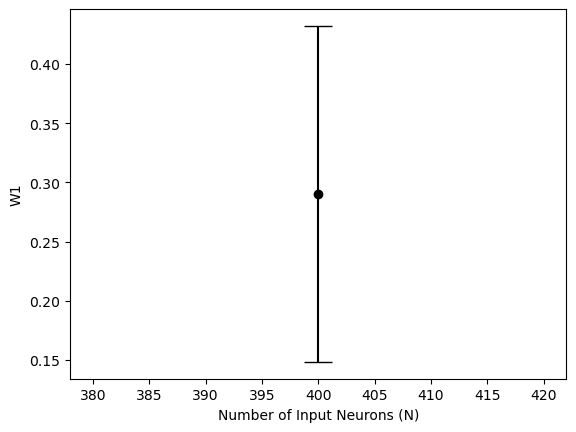

In [34]:
fig, ax = plt.subplots()
ax.scatter(400, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(400, array_best_w1_best_w2[0]/0.3445, std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input400forW1.png")

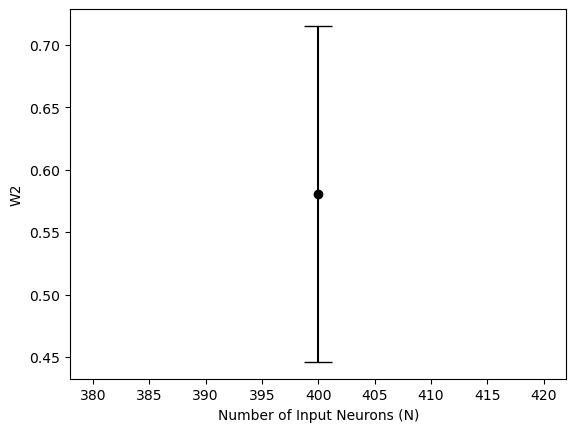

In [35]:
fig2, ax2 = plt.subplots()
ax2.scatter(400, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(400, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input400forW2.png")

In [36]:
data = {}
data['N'] = 400
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("400_input_neurons_w1_w2.npz",**data)